# Basic model
##### - no feature engineering

In [349]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score
from xgboost import XGBClassifier
from functions import ROC

seed = 42
np.random.seed = seed

In [350]:
# Read the data
path = "/Users/hubertmagdziak/Desktop/ML-heart-failure-prediction/heart_failure_clinical_records_dataset.csv"
df = pd.read_csv(path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Correlation between 'time' and 'DEATH_EVENT': -0.54


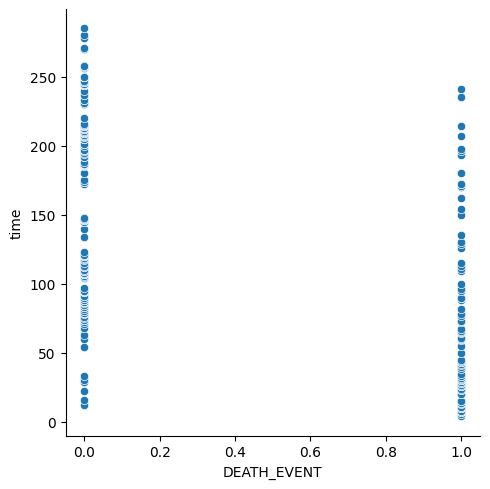

In [351]:
# Examine high correlation between "time" and "DEATH_EVENT"
sns.relplot(data=df,
            y="time",
            x="DEATH_EVENT",
            kind="scatter")

# Correlation value
print(f"Correlation between 'time' and 'DEATH_EVENT': {df[['time', 'DEATH_EVENT']].corr('spearman').values[0,1]:.2f}")

In [352]:
# Split the data into training and testing
df_modelling = df.copy()
X = df_modelling.drop(columns=["DEATH_EVENT"])
y = df_modelling["DEATH_EVENT"]
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.35,
    shuffle=True,
    stratify=y,
    random_state=seed
)

X_validate, X_test, y_validate, y_test = train_test_split(
    X_test,
    y_test,
    test_size=0.5,
    shuffle=True,
    stratify=y_test,
    random_state=seed
)
print(f"X_train shape: {X_train.shape}\n")
print(f"X_validate shape: {X_validate.shape}\n")
print(f"X_test shape: {X_test.shape}\n")
print(f"y_train shape: {y_train.shape}\n")
print(f"y_validate shape: {y_validate.shape}\n")
print(f"y_test shape: {y_test.shape}\n")

X_train shape: (194, 12)

X_validate shape: (52, 12)

X_test shape: (53, 12)

y_train shape: (194,)

y_validate shape: (52,)

y_test shape: (53,)



In [353]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_validate = scaler.transform(X_validate)

### Basic Logistic Regression

In [354]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_elastic_net = log_reg.predict(X_validate)
y_pred_proba_elastic_net = log_reg.predict_proba(X_validate)[:,1]
print(classification_report(y_validate, y_pred_elastic_net))
print(confusion_matrix(y_validate, y_pred_elastic_net))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        35
           1       0.85      0.65      0.73        17

    accuracy                           0.85        52
   macro avg       0.85      0.79      0.81        52
weighted avg       0.85      0.85      0.84        52

[[33  2]
 [ 6 11]]


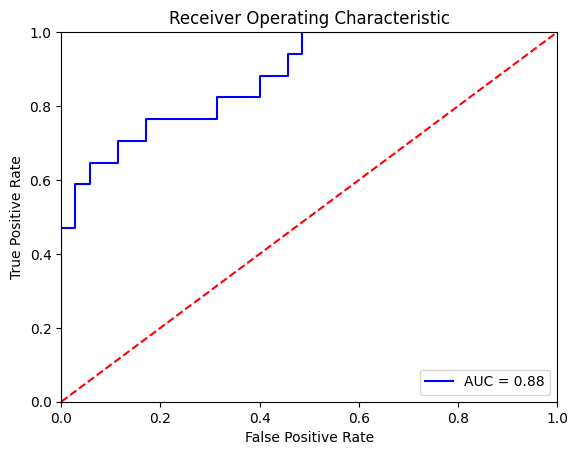

In [355]:
ROC(y_validate, y_pred_proba_elastic_net)

In [356]:
cut_off_lr = ROC(y_validate, y_pred_proba_elastic_net, return_optimal_threshold=True)
print(classification_report(y_validate, y_pred_proba_elastic_net >= cut_off_lr))

Threshold value is: 0.2852978144744931
              precision    recall  f1-score   support

           0       0.88      0.83      0.85        35
           1       0.68      0.76      0.72        17

    accuracy                           0.81        52
   macro avg       0.78      0.80      0.79        52
weighted avg       0.82      0.81      0.81        52



### Basic Random Forest

In [357]:
rf = RandomForestClassifier(random_state=seed)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_validate)
y_pred_proba_rf = rf.predict_proba(X_validate)[:,1]
print(classification_report(y_validate, y_pred_rf))
print(confusion_matrix(y_validate, y_pred_rf))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88        35
           1       0.90      0.53      0.67        17

    accuracy                           0.83        52
   macro avg       0.85      0.75      0.77        52
weighted avg       0.84      0.83      0.81        52

[[34  1]
 [ 8  9]]


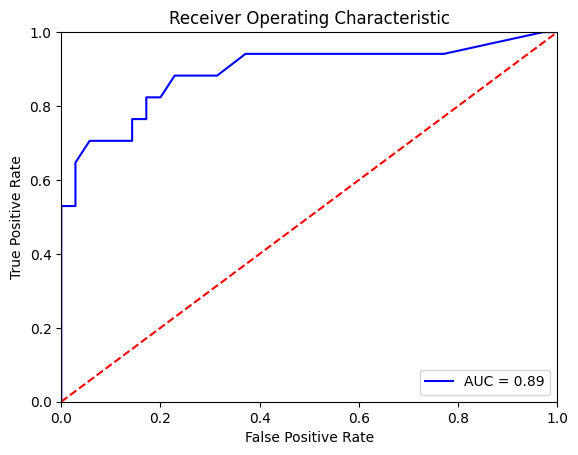

In [358]:
ROC(y_validate, y_pred_proba_rf)

In [359]:
cut_off_rf = ROC(y_validate, y_pred_proba_rf, return_optimal_threshold=True)
print(classification_report(y_validate, y_pred_proba_rf >= cut_off_rf))

Threshold value is: 0.27
              precision    recall  f1-score   support

           0       0.93      0.77      0.84        35
           1       0.65      0.88      0.75        17

    accuracy                           0.81        52
   macro avg       0.79      0.83      0.80        52
weighted avg       0.84      0.81      0.81        52



### Basic XGBoost

In [360]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_validate)
y_pred_proba_xgb = xgb.predict_proba(X_validate)[:, 1]
print(classification_report(y_validate, y_pred_xgb))
print(confusion_matrix(y_validate, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88        35
           1       0.79      0.65      0.71        17

    accuracy                           0.83        52
   macro avg       0.81      0.78      0.79        52
weighted avg       0.82      0.83      0.82        52

[[32  3]
 [ 6 11]]


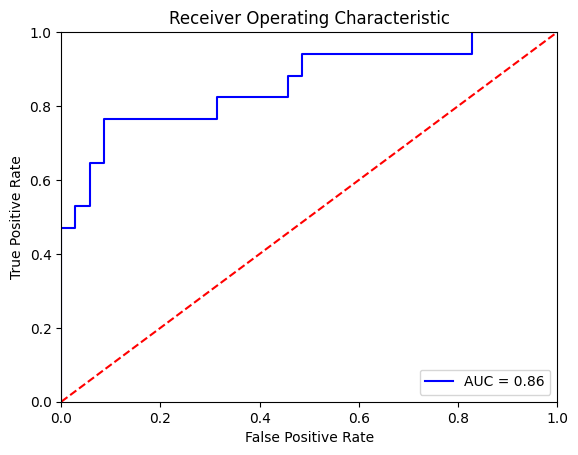

In [361]:
ROC(y_validate, y_pred_proba_xgb)

In [362]:
cut_off_xgb = ROC(y_validate, y_pred_proba_xgb, return_optimal_threshold=True)
print(classification_report(y_validate, y_pred_proba_xgb >= cut_off_xgb))

Threshold value is: 0.41815427
              precision    recall  f1-score   support

           0       0.89      0.91      0.90        35
           1       0.81      0.76      0.79        17

    accuracy                           0.87        52
   macro avg       0.85      0.84      0.84        52
weighted avg       0.86      0.87      0.86        52



# Compare basic models

In [363]:
# Create data frame with results
basic_models = dict()
basic_models['LogisticRegression'] = balanced_accuracy_score(y_validate, y_pred_proba_elastic_net >= cut_off_lr)
basic_models['Random Forest'] = balanced_accuracy_score(y_validate, y_pred_proba_rf >= cut_off_rf)
basic_models['XGBoost'] = balanced_accuracy_score(y_validate, y_pred_proba_xgb >= cut_off_xgb)
pd.Series(basic_models).to_frame("balanced accuracy").sort_values(by="balanced accuracy", ascending=False)

balanced accuracy
XGBoost                      0.839496
Random Forest                0.826891
LogisticRegression           0.796639

# Tuned Logistic Regression

In [364]:
def HYPER_LogisticRegression(X_train, y_train, random_state : int = seed):
    # Define the Logistic Regression model
    logreg = LogisticRegression(random_state=seed)

    # Define the parameter grid
    param_grid = {
        'penalty': ['l1', 'l2', 'elasticnet', 'none'],       # Regularization types
        'C': np.logspace(-6, 6, 13),                         # Regularization strength
        'solver': ['liblinear', 'lbfgs', 'saga', 'newton-cg'],  # Solvers
        'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],                # Mixing ratio for elasticnet
        'max_iter': [100, 500, 1000, 5000]                   # Number of iterations
    }

    # Filter incompatible penalty/solver combinations
    # GridSearchCV will ignore incompatible combinations automatically.

    # Set up GridSearchCV
    grid_search = GridSearchCV(estimator=logreg,
                            param_grid=param_grid,
                            cv=5,  # 5-fold cross-validation
                            scoring='balanced_accuracy',  # Metric to optimize
                            verbose=2,           # Output progress
                            n_jobs=-1)           # Use all available cores

    # Fit the model
    grid_search.fit(X_train, y_train)

    return grid_search.best_estimator_

In [365]:
hlr = HYPER_LogisticRegression(X_train=X_train, y_train=y_train)

Fitting 5 folds for each of 9152 candidates, totalling 45760 fits
[CV] END C=1e-06, l1_ratio=0, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1e-06, l1_ratio=0, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1e-06, l1_ratio=0, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1e-06, l1_ratio=0, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1e-06, l1_ratio=0, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1e-06, l1_ratio=0, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1e-06, l1_ratio=0, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1e-06, l1_ratio=0, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1e-06, l1_ratio=0, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1e-06, l1_ratio=0, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1e-06, l1_rat

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/skle

CV] END C=1e-06, l1_ratio=0, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1e-06, l1_ratio=0.1, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1e-06, l1_ratio=0.1, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1e-06, l1_ratio=0.1, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1e-06, l1_ratio=0.1, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1e-06, l1_ratio=0.1, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1e-06, l1_ratio=0.1, max_iter=500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1e-06, l1_ratio=0.1, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1e-06, l1_ratio=0.1, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1e-06, l1_ratio=0.1, max_iter=500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1e-06, l1_ratio=0.1, max_iter=500, penalty=none, solver=libl

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_mod

[CV] END C=1e-06, l1_ratio=0.4, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1e-06, l1_ratio=0.3, max_iter=500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=1e-06, l1_ratio=0.3, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1e-06, l1_ratio=0.4, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1e-06, l1_ratio=0.3, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1e-06, l1_ratio=0.4, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1e-06, l1_ratio=0.2, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1e-06, l1_ratio=0.4, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=1e-06, l1_ratio=0.4, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1e-06, l1_ratio=0.4, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1e-06, l1_ratio=0.4, max_iter=100, pe

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/skle

[CV] END C=1e-06, l1_ratio=0.4, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=1e-06, l1_ratio=0.5, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1e-06, l1_ratio=0.5, max_iter=500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1e-06, l1_ratio=0.6, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1e-06, l1_ratio=0.5, max_iter=500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1e-06, l1_ratio=0.5, max_iter=500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1e-06, l1_ratio=0.6, max_iter=500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1e-06, l1_ratio=0.5, max_iter=1000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1e-06, l1_ratio=0.5, max_iter=500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1e-06, l1_ratio=0.6, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1e-06, l1_ratio=0.5, max_iter=500, p

ached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Py

[CV] END C=1e-06, l1_ratio=0.8, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=1e-06, l1_ratio=0.8, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=1e-06, l1_ratio=0.8, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1e-06, l1_ratio=0.8, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1e-06, l1_ratio=0.7, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1e-06, l1_ratio=0.8, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1e-06, l1_ratio=0.8, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1e-06, l1_ratio=0.8, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1e-06, l1_ratio=0.8, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1e-06, l1_ratio=0.8, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1e-06, l1_rati

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_mod

[CV] END C=1e-05, l1_ratio=0, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=1e-05, l1_ratio=0, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=1e-06, l1_ratio=0.8, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1e-06, l1_ratio=1, max_iter=500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1e-05, l1_ratio=0, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=1e-06, l1_ratio=0.8, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1e-05, l1_ratio=0, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=1e-06, l1_ratio=0.8, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1e-06, l1_ratio=1, max_iter=500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1e-06, l1_ratio=0.8, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1e-05, l1_ratio=0, 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/skle

[CV] END C=1e-05, l1_ratio=0, max_iter=500, penalty=none, solver=saga; total time=   0.0s
[CV] END C=1e-05, l1_ratio=0, max_iter=500, penalty=none, solver=saga; total time=   0.0s
[CV] END C=1e-05, l1_ratio=0, max_iter=500, penalty=none, solver=saga; total time=   0.0s
[CV] END C=1e-05, l1_ratio=0, max_iter=500, penalty=none, solver=saga; total time=   0.0s
[CV] END C=1e-05, l1_ratio=0, max_iter=500, penalty=none, solver=saga; total time=   0.0s
[CV] END C=1e-05, l1_ratio=0.1, max_iter=1000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1e-05, l1_ratio=0, max_iter=500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=1e-05, l1_ratio=0, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1e-05, l1_ratio=0, max_iter=500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=1e-05, l1_ratio=0.1, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=1e-05, l1_ratio=0, max_iter=500, penalty=none, solver=newton-cg; total ti

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/skle

[CV] END C=1e-05, l1_ratio=0.2, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1e-05, l1_ratio=0.3, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=1e-05, l1_ratio=0.3, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1e-05, l1_ratio=0.2, max_iter=500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1e-05, l1_ratio=0.2, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1e-05, l1_ratio=0.2, max_iter=500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1e-05, l1_ratio=0.2, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1e-05, l1_ratio=0.3, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=1e-05, l1_ratio=0.2, max_iter=500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1e-05, l1_ratio=0.3, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1e-05, l1_ratio=0.3, max_

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/skle

[CV] END C=1e-05, l1_ratio=0.5, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=1e-05, l1_ratio=0.5, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1e-05, l1_ratio=0.4, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1e-05, l1_ratio=0.3, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1e-05, l1_ratio=0.7, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1e-05, l1_ratio=0.5, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1e-05, l1_ratio=0.4, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1e-05, l1_ratio=0.3, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1e-05, l1_ratio=0.3, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1e-05, l1_ratio=0.6, max_iter=500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1e-05, l1_ratio=0.7, m

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/skle

[CV] END C=1e-05, l1_ratio=0.7, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1e-05, l1_ratio=0.7, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1e-05, l1_ratio=0.7, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1e-05, l1_ratio=0.8, max_iter=500, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=1e-05, l1_ratio=0.7, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1e-05, l1_ratio=0.7, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1e-05, l1_ratio=0.6, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1e-05, l1_ratio=0.7, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s[CV] END C=1e-05, l1_ratio=0.5, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s[CV] END C=1e-05, l1_ratio=0.6, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s

[CV] END C=1e-05, 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/skle

[CV] END C=1e-05, l1_ratio=0.9, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1e-05, l1_ratio=1, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, l1_ratio=0, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1e-05, l1_ratio=0.8, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1e-05, l1_ratio=0.9, max_iter=500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1e-05, l1_ratio=0.9, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.0001, l1_ratio=0, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1e-05, l1_ratio=0.9, max_iter=500, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=1e-05, l1_ratio=0.9, max_iter=500, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=1e-05, l1_ratio=0.8, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1e-05, l1_ratio=1, max_iter=500, penalty

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/skle

[CV] END C=0.0001, l1_ratio=0.1, max_iter=500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, l1_ratio=0, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1e-05, l1_ratio=0.8, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, l1_ratio=0.2, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, l1_ratio=0.1, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1e-05, l1_ratio=0.8, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, l1_ratio=0.1, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1e-05, l1_ratio=0.8, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, l1_ratio=0.1, max_iter=1000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.0001, l1_ratio=0.2, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, l1_ratio=0.2, max_

sed when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Framewo

[CV] END C=0.0001, l1_ratio=0.4, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, l1_ratio=0.5, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, l1_ratio=0.4, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.0001, l1_ratio=0.3, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.0001, l1_ratio=0.5, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, l1_ratio=0.4, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, l1_ratio=0.3, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.0001, l1_ratio=0.4, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, l1_ratio=0.4, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, l1_ratio=0.3, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, l1_ratio=0.4, max_iter=500

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/skle

=0.6, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, l1_ratio=0.6, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.0001, l1_ratio=0.4, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, l1_ratio=0.6, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, l1_ratio=0.6, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, l1_ratio=0.5, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, l1_ratio=0.4, max_iter=1000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.0001, l1_ratio=0.6, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, l1_ratio=0.5, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, l1_ratio=0.5, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, l1_ratio=0.5, max_iter=100, penalty=l1, solver

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/skle

 solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, l1_ratio=0.9, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, l1_ratio=0.7, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, l1_ratio=0.7, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, l1_ratio=0.7, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, l1_ratio=0.7, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, l1_ratio=0.7, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, l1_ratio=0.9, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, l1_ratio=0.8, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.0001, l1_ratio=0.7, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, l1_ratio=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/skle

nalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, l1_ratio=0, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.001, l1_ratio=0.1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, l1_ratio=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, l1_ratio=1, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, l1_ratio=0.1, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, l1_ratio=0, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, l1_ratio=0, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, l1_ratio=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, l1_ratio=1, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, l1_ratio=0, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/skle

[CV] END C=0.001, l1_ratio=0.2, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, l1_ratio=0.3, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, l1_ratio=0.3, max_iter=500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, l1_ratio=0.3, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.001, l1_ratio=0.2, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, l1_ratio=0.5, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, l1_ratio=0.3, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, l1_ratio=0.3, max_iter=500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, l1_ratio=0.2, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, l1_ratio=0.3, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.001, l1_ratio=0.3, max_iter=100, penal

ework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1

[CV] END C=0.001, l1_ratio=0.7, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.001, l1_ratio=0.7, max_iter=500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, l1_ratio=0.6, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.001, l1_ratio=0.7, max_iter=500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, l1_ratio=0.7, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, l1_ratio=0.6, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, l1_ratio=0.7, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.001, l1_ratio=0.6, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.001, l1_ratio=0.7, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, l1_ratio=0.7, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, l1_ratio=0.5, max_iter=50

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/skle

[CV] END C=0.001, l1_ratio=0.9, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, l1_ratio=0.8, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.001, l1_ratio=0.9, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.01, l1_ratio=0, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.001, l1_ratio=1, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.001, l1_ratio=1, max_iter=1000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.001, l1_ratio=0.8, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, l1_ratio=0.9, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, l1_ratio=0, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.001, l1_ratio=1, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.001, l1_ratio=0.9, max_iter=5000, penalty=l2, solver=newton-cg; total time=

tic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticne

total time=   0.0s
[CV] END C=0.01, l1_ratio=0.1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.1, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.1, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.1, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.1, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.1, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.1, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.1, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.1, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.1, max_iter=100, penalty=elasticnet, solver=lbfgs; tota

arn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used whe

 total time=   0.0s
[CV] END C=0.01, l1_ratio=0.3, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.3, max_iter=500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.3, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.4, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.2, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.1, max_iter=5000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.3, max_iter=500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.4, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.3, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.3, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.4, max_ite

arn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used whe

enalty=none, solver=saga; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.5, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.6, max_iter=5000, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.5, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.6, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.6, max_iter=5000, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.6, max_iter=5000, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.4, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.6, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.6, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.6, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, l1_rati

n penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Pyt

alty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.8, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.8, max_iter=1000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, l1_ratio=1, max_iter=500, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, l1_ratio=1, max_iter=500, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.9, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.01, l1_ratio=1, max_iter=500, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.9, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.7, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, l1_ratio=1, max_iter=500, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.9, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, l1_ratio=0.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/skle

 total time=   0.0s
[CV] END C=0.1, l1_ratio=0.2, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.1, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, l1_ratio=0, max_iter=5000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.1, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.2, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.1, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.1, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.1, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, l1_ratio=0, max_iter=5000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.1, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, l1_ratio=0, max_iter=500, 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/skle

[CV] END C=0.1, l1_ratio=0.5, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.2, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.5, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.5, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.3, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.5, max_iter=500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.5, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.3, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.5, max_iter=500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.4, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.5, max_iter=500, penal

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/skle

[CV] END C=0.1, l1_ratio=0.7, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.8, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.7, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.6, max_iter=500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.7, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.8, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.7, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.6, max_iter=500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.7, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.6, max_iter=500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.7, max_it

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/skle

[CV] END C=0.1, l1_ratio=0.9, max_iter=5000, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.1, l1_ratio=1, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.9, max_iter=500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.8, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.1, l1_ratio=1, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.1, l1_ratio=1, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.9, max_iter=500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, l1_ratio=1, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.9, max_iter=500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, l1_ratio=1, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.8, max_iter=1000, pena

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/skle

ime=   0.0s
[CV] END C=0.1, l1_ratio=0.9, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.9, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.9, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, l1_ratio=1, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.9, max_iter=1000, penalty=none, solver=saga; total time=   0.0s
[CV] END C=1.0, l1_ratio=0, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.1, l1_ratio=1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.9, max_iter=1000, penalty=none, solver=saga; total time=   0.0s
[CV] END C=1.0, l1_ratio=0, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, l1_ratio=0.9, max_iter=1000, penalty=none, solver=saga; total time=   0.0s
[CV] END C=1.0, l1_ratio=0, max_iter=100, penalty=elasticnet, solve

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/skle

[CV] END C=1.0, l1_ratio=0.2, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.2, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.2, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.2, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.2, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.3, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.1, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s[CV] END C=1.0, l1_ratio=0.1, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s

[CV] END C=1.0, l1_ratio=0.1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.2, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.1, max_iter=1000, penalty=none, solver=liblinear; total time= 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/skle

[CV] END C=1.0, l1_ratio=0.4, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.3, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.2, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.3, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.2, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.4, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.3, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.4, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.5, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.3, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.1, max_iter=5000, penalty=elasticnet, solver=newton-cg; tot

t'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/

io=0.7, max_iter=500, penalty=l1, solver=saga; total time=   0.0s[CV] END C=1.0, l1_ratio=0.7, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s

[CV] END C=1.0, l1_ratio=0.6, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.5, max_iter=500, penalty=none, solver=saga; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.6, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.5, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.6, max_iter=1000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.5, max_iter=500, penalty=none, solver=saga; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.7, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.6, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.6, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1.0, l1_rat

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/skle

[CV] END C=1.0, l1_ratio=0.9, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.8, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.9, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.8, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.8, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1.0, l1_ratio=1, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.8, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.8, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.8, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.8, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1.0, l1_ratio=0.8, 

y is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.fram

[CV] END C=10.0, l1_ratio=0.1, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10.0, l1_ratio=0.2, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10.0, l1_ratio=0.3, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10.0, l1_ratio=0.1, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10.0, l1_ratio=0.2, max_iter=100, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=10.0, l1_ratio=0.1, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10.0, l1_ratio=0.1, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10.0, l1_ratio=0.2, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=10.0, l1_ratio=0.2, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10.0, l1_ratio=0.1, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10.0, l1_ratio=0.3,

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/skle

[CV] END C=10.0, l1_ratio=0.3, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10.0, l1_ratio=0.3, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10.0, l1_ratio=0.4, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10.0, l1_ratio=0.3, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10.0, l1_ratio=0.5, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=10.0, l1_ratio=0.3, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10.0, l1_ratio=0.3, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10.0, l1_ratio=0.3, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10.0, l1_ratio=0.3, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10.0, l1_ratio=0.4, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV]

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/skle

[CV] END C=10.0, l1_ratio=0.6, max_iter=500, penalty=none, solver=saga; total time=   0.0s
[CV] END C=10.0, l1_ratio=0.7, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=10.0, l1_ratio=0.7, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=10.0, l1_ratio=0.6, max_iter=500, penalty=none, solver=saga; total time=   0.0s
[CV] END C=10.0, l1_ratio=0.6, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10.0, l1_ratio=0.5, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=10.0, l1_ratio=0.7, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=10.0, l1_ratio=0.7, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10.0, l1_ratio=0.7, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10.0, l1_ratio=0.7, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10.0, l1_ratio=0.7, max_iter=500, penalty=l2, solver=newton-cg

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/skle

[CV] END C=10.0, l1_ratio=0.7, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10.0, l1_ratio=0.8, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10.0, l1_ratio=0.8, max_iter=500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10.0, l1_ratio=0.8, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10.0, l1_ratio=0.7, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10.0, l1_ratio=0.8, max_iter=500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10.0, l1_ratio=0.7, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10.0, l1_ratio=0.8, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10.0, l1_ratio=0.8, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s[CV] END C=10.0, l1_ratio=0.7, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s

[CV] END C=10.0, l1_ra

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/skle

[CV] END C=100.0, l1_ratio=0.1, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=100.0, l1_ratio=0, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100.0, l1_ratio=0, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100.0, l1_ratio=0.1, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=100.0, l1_ratio=0, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=100.0, l1_ratio=0, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100.0, l1_ratio=0.1, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=100.0, l1_ratio=0, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100.0, l1_ratio=0, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=100.0, l1_ratio=0, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10.0, l1_ratio=1, max_iter=500,

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/skle

[CV] END C=100.0, l1_ratio=0.1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100.0, l1_ratio=0.2, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=100.0, l1_ratio=0.3, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100.0, l1_ratio=0.1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100.0, l1_ratio=0.2, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100.0, l1_ratio=0.1, max_iter=500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=100.0, l1_ratio=0.1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100.0, l1_ratio=0.1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100.0, l1_ratio=0.1, max_iter=500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=100.0, l1_ratio=0.2, max_iter=5000, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=100.0, l1_ratio=0.1, max_iter=500, penalty

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/skle

[CV] END C=100.0, l1_ratio=0.3, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100.0, l1_ratio=0.4, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100.0, l1_ratio=0.4, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100.0, l1_ratio=0.3, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100.0, l1_ratio=0.4, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=100.0, l1_ratio=0.4, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100.0, l1_ratio=0.3, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100.0, l1_ratio=0.4, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=100.0, l1_ratio=0.4, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100.0, l1_ratio=0.4, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/skle

[CV] END C=100.0, l1_ratio=0.4, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=100.0, l1_ratio=0.4, max_iter=1000, penalty=none, solver=saga; total time=   0.0s
[CV] END C=100.0, l1_ratio=0.4, max_iter=1000, penalty=none, solver=saga; total time=   0.0s
[CV] END C=100.0, l1_ratio=0.5, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100.0, l1_ratio=0.4, max_iter=1000, penalty=none, solver=saga; total time=   0.0s
[CV] END C=100.0, l1_ratio=0.7, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=100.0, l1_ratio=0.4, max_iter=1000, penalty=none, solver=saga; total time=   0.0s
[CV] END C=100.0, l1_ratio=0.5, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=100.0, l1_ratio=0.6, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100.0, l1_ratio=0.4, max_iter=1000, penalty=none, solver=saga; total time=   0.0s
[CV] END C=100.0, l1_ratio=0.5, max_iter=500, penalty=

e-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter i

[CV] END C=100.0, l1_ratio=1, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100.0, l1_ratio=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=100.0, l1_ratio=0.8, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=100.0, l1_ratio=0.8, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=100.0, l1_ratio=0.8, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=100.0, l1_ratio=0.8, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=100.0, l1_ratio=0.8, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=100.0, l1_ratio=1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=100.0, l1_ratio=0.8, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=100.0, l1_ratio=0.8, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=100.0, l1_ratio=0.7, max_iter=5000, penalty=elasticnet, s

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/skle

[CV] END C=1000.0, l1_ratio=0.2, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.1, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.1, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.2, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.2, max_iter=100, penalty=elasticnet, solver=newton-cg; to

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/skle

[CV] END C=1000.0, l1_ratio=0.3, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.2, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.3, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s[CV] END C=1000.0, l1_ratio=0.4, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s

[CV] END C=1000.0, l1_ratio=0.3, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.4, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.3, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.4, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.3, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.3, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.3, max_iter=500, pena

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/skle

[CV] END C=1000.0, l1_ratio=0.5, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.5, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.6, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.5, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.6, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.5, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.4, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.5, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.5, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.5, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100

(penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib

 END C=1000.0, l1_ratio=0.7, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.7, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.9, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.7, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.9, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.7, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.8, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.7, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.7, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1000.0, l1_ratio=0.7, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1

n penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Pyt

[CV] END C=1000.0, l1_ratio=1, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10000.0, l1_ratio=0.1, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, l1_ratio=0, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, l1_ratio=0.1, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, l1_ratio=0.1, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=1000.0, l1_ratio=1, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10000.0, l1_ratio=0.1, max_iter=500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, l1_ratio=0.1, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, l1_ratio=0.1, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, l1_ratio=0.1, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, l1_ratio=0.1, max_iter=5000, penalty=n

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/skle

 l1_ratio=0.3, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, l1_ratio=0.3, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, l1_ratio=0.4, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, l1_ratio=0.4, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10000.0, l1_ratio=0.3, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, l1_ratio=0.3, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=10000.0, l1_ratio=0.4, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, l1_ratio=0.3, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, l1_ratio=0.2, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s[CV] END C=10000.0, l1_ratio=0.4, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s

[CV] END C=10000.0, l1_ratio=0.3, max_iter=5000, penalty=n

arn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used whe

[CV] END C=10000.0, l1_ratio=0.5, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, l1_ratio=0.7, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, l1_ratio=0.5, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, l1_ratio=0.6, max_iter=500, penalty=none, solver=saga; total time=   0.0s
[CV] END C=10000.0, l1_ratio=0.6, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, l1_ratio=0.7, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, l1_ratio=0.5, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, l1_ratio=0.6, max_iter=500, penalty=none, solver=saga; total time=   0.0s
[CV] END C=10000.0, l1_ratio=0.7, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, l1_ratio=0.5, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/skle

1_ratio=0.9, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, l1_ratio=0.8, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, l1_ratio=0.8, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, l1_ratio=0.8, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, l1_ratio=0.9, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, l1_ratio=0.8, max_iter=5000, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=10000.0, l1_ratio=0.9, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10000.0, l1_ratio=0.8, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, l1_ratio=0.9, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, l1_ratio=0.6, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/skle

D C=10000.0, l1_ratio=1, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100000.0, l1_ratio=0, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, l1_ratio=1, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, l1_ratio=1, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, l1_ratio=1, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=100000.0, l1_ratio=0, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, l1_ratio=1, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, l1_ratio=0.9, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, l1_ratio=0.9, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, l1_ratio=1, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=100000.0

 only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/

[CV] END C=100000.0, l1_ratio=0.3, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=100000.0, l1_ratio=0.2, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100000.0, l1_ratio=0.4, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100000.0, l1_ratio=0.3, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=100000.0, l1_ratio=0.2, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=100000.0, l1_ratio=0.4, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100000.0, l1_ratio=0.4, max_iter=500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=100000.0, l1_ratio=0.4, max_iter=1000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100000.0, l1_ratio=0.3, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=100000.0, l1_ratio=0.3, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/skle

  0.0s
[CV] END C=100000.0, l1_ratio=0.6, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100000.0, l1_ratio=0.7, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100000.0, l1_ratio=0.6, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100000.0, l1_ratio=0.6, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=100000.0, l1_ratio=0.5, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=100000.0, l1_ratio=0.5, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100000.0, l1_ratio=0.6, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=100000.0, l1_ratio=0.6, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100000.0, l1_ratio=0.5, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=100000.0, l1_ratio=0.5, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=100000.0, l1

.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio para

, l1_ratio=0.8, max_iter=500, penalty=none, solver=saga; total time=   0.0s
[CV] END C=100000.0, l1_ratio=0.9, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=100000.0, l1_ratio=0.8, max_iter=500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=100000.0, l1_ratio=0.9, max_iter=500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=100000.0, l1_ratio=0.9, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=100000.0, l1_ratio=0.8, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=100000.0, l1_ratio=0.8, max_iter=500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=100000.0, l1_ratio=1, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100000.0, l1_ratio=0.9, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=100000.0, l1_ratio=0.8, max_iter=500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=100000.0, l1_ratio=0.9, max_iter=

r_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty

tal time=   0.0s
[CV] END C=1000000.0, l1_ratio=0, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1000000.0, l1_ratio=0.1, max_iter=1000, penalty=none, solver=saga; total time=   0.0s
[CV] END C=1000000.0, l1_ratio=0.2, max_iter=500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=1000000.0, l1_ratio=0, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1000000.0, l1_ratio=0, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1000000.0, l1_ratio=0.1, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=1000000.0, l1_ratio=0, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1000000.0, l1_ratio=0, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1000000.0, l1_ratio=0.2, max_iter=500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=1000000.0, l1_ratio=0, max_iter=5000, penalty=elasticnet, solver=newt

ework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1

[CV] END C=1000000.0, l1_ratio=0.6, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1000000.0, l1_ratio=0.5, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1000000.0, l1_ratio=0.6, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1000000.0, l1_ratio=0.6, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1000000.0, l1_ratio=0.6, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=1000000.0, l1_ratio=0.3, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1000000.0, l1_ratio=0.6, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1000000.0, l1_ratio=0.6, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1000000.0, l1_ratio=0.6, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1000000.0, l1_ratio=0.6, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1000000.0, l1_ratio=

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/skle

[CV] END C=1000000.0, l1_ratio=0.7, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1000000.0, l1_ratio=0.6, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1000000.0, l1_ratio=0.8, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1000000.0, l1_ratio=0.8, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=1000000.0, l1_ratio=0.6, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1000000.0, l1_ratio=0.6, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1000000.0, l1_ratio=0.7, max_iter=1000, penalty=none, solver=saga; total time=   0.0s
[CV] END C=1000000.0, l1_ratio=0.7, max_iter=1000, penalty=none, solver=saga; total time=   0.0s
[CV] END C=1000000.0, l1_ratio=0.7, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=1000000.0, l1_ratio=0.6, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1000000.0, l

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/skle

[CV] END C=1000000.0, l1_ratio=1, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1000000.0, l1_ratio=1, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1000000.0, l1_ratio=1, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1000000.0, l1_ratio=1, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1000000.0, l1_ratio=1, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1000000.0, l1_ratio=1, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1000000.0, l1_ratio=1, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1000000.0, l1_ratio=1, max_iter=5000, penalty=l2, solver=saga; total time=   0.0s


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
25740 fits failed out of a total of 45760.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2860 fits failed with the following error:
Traceback (m

              precision    recall  f1-score   support

           0       0.81      0.97      0.88        35
           1       0.90      0.53      0.67        17

    accuracy                           0.83        52
   macro avg       0.85      0.75      0.77        52
weighted avg       0.84      0.83      0.81        52



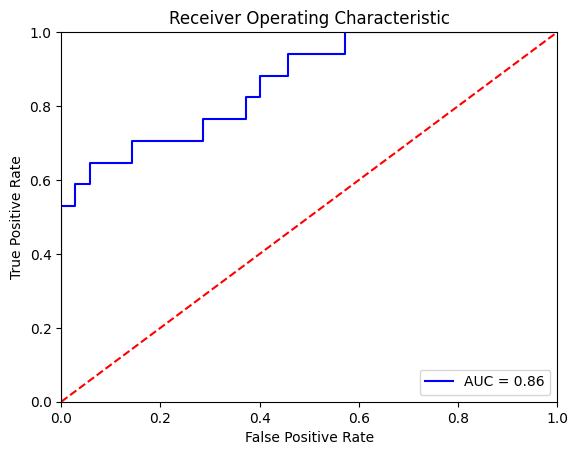

Threshold value is: 0.4751855893593926
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        35
           1       0.85      0.65      0.73        17

    accuracy                           0.85        52
   macro avg       0.85      0.79      0.81        52
weighted avg       0.85      0.85      0.84        52



In [366]:
y_pred_hlr = hlr.predict(X_validate)
y_pred_proba_hlr = hlr.predict_proba(X_validate)[:,1]
print(classification_report(y_validate, y_pred_hlr))
ROC(y_validate, y_pred_proba_hlr)
print(classification_report(y_validate, y_pred_proba_hlr  >= ROC(y_validate, y_pred_proba_hlr, return_optimal_threshold=True)))

## Tuned Random Forest

In [367]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import randint

def HYPER_RandomForest(X_train, y_train, seed : int = 42):
    # Define the model
    rf_model = RandomForestClassifier(random_state=seed)
    # Define the parameter distributions
    param_distributions = {
        'n_estimators': randint(100, 1000),      # Random integers between 100 and 1000
        'max_depth': randint(10, 50),           # Random integers between 10 and 50
        'min_samples_split': randint(2, 20),    # Random integers between 2 and 20
        'min_samples_leaf': randint(1, 10),     # Random integers between 1 and 10
        'max_features': ['sqrt', 'log2', None], # Categorical options
        'bootstrap': [True, False]              # Categorical options
    }
    # Set up RandomizedSearchCV
    random_search = RandomizedSearchCV(
        estimator=rf_model,
        param_distributions=param_distributions,
        n_iter=100,         # Number of random combinations to try
        scoring='balanced_accuracy', # Evaluation metric
        cv=5,              # 5-fold cross-validation
        verbose=2,         # Output progress
        random_state=seed,   # For reproducibility
        n_jobs=-1          # Use all available cores
    )
    # Perform the search
    random_search.fit(X_train, y_train)
    # Evaluate on the test set
    return random_search.best_estimator_

In [368]:
hrf = HYPER_RandomForest(X_train=X_train, y_train=y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END bootstrap=True, max_depth=38, max_features=None, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=   0.2s
[CV] END bootstrap=True, max_depth=38, max_features=None, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=   0.2s
[CV] END bootstrap=True, max_depth=38, max_features=None, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=   0.2s
[CV] END bootstrap=True, max_depth=38, max_features=None, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=   0.2s
[CV] END bootstrap=True, max_depth=38, max_features=None, min_samples_leaf=8, min_samples_split=8, n_estimators=221; total time=   0.2s
[CV] END bootstrap=False, max_depth=12, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=443; total time=   0.2s
[CV] END bootstrap=False, max_depth=12, max_features=log2, min_samples_leaf=5, min_samples_split=3, n_estimators=443; to

              precision    recall  f1-score   support

           0       0.82      0.94      0.88        35
           1       0.83      0.59      0.69        17

    accuracy                           0.83        52
   macro avg       0.83      0.77      0.78        52
weighted avg       0.83      0.83      0.82        52



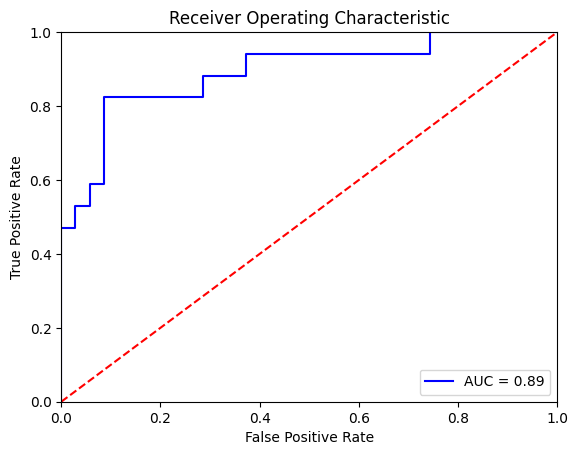

Threshold value is: 0.4189266018831426
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        35
           1       0.82      0.82      0.82        17

    accuracy                           0.88        52
   macro avg       0.87      0.87      0.87        52
weighted avg       0.88      0.88      0.88        52



In [369]:
y_pred_hrf = hrf.predict(X_validate)
y_pred_proba_hrf = hrf.predict_proba(X_validate)[:,1]
print(classification_report(y_validate, y_pred_hrf))
ROC(y_validate, y_pred_proba_hrf)
print(classification_report(y_validate, y_pred_proba_hrf  >= ROC(y_validate, y_pred_proba_hrf, return_optimal_threshold=True)))

## Tuned XGBoost

In [374]:
def HYPER_xgboost(X_train, y_train, random_seed : int = seed):
    # Define the XGBoost model
    xgb_model = XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        use_label_encoder=False,
        tree_method='hist',  # Optimized for speed and memory
        random_state=seed
    )

    # Define the hyperparameter search space
    param_dist = {
        'max_depth': [3, 4, 5, 6, 7],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'n_estimators': [50, 100, 200],
        'subsample': [0.5, 0.7, 0.9, 1.0],
        'colsample_bytree': [0.5, 0.7, 0.9, 1.0],
        'gamma': [0, 0.1, 0.5, 1, 5],
        'min_child_weight': [1, 5, 10]
    }

    # Set up RandomizedSearchCV
    random_search = RandomizedSearchCV(
        estimator=xgb_model,
        param_distributions=param_dist,
        n_iter=100,  # Limit the number of iterations
        scoring='balanced_accuracy',
        cv=3,  # 3-fold cross-validation
        verbose=2,
        n_jobs=-1,  # Use all CPU cores
        random_state=seed
    )

    # Fit the RandomizedSearchCV
    random_search.fit(X_train, y_train)

    # Evaluate on the test set
    return random_search.best_estimator_

In [375]:
hxgb = HYPER_xgboost(X_train=X_train, y_train=y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=10, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=10, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_depth=4, min_child_weight=10, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.5, learning_rate=0.05, max_depth=7, min_child_weight=10, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=10, n_estimators=200, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=10, n_estimators=200, subsample=0.5; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=1, learning_rate=0.

              precision    recall  f1-score   support

           0       0.81      0.97      0.88        35
           1       0.90      0.53      0.67        17

    accuracy                           0.83        52
   macro avg       0.85      0.75      0.77        52
weighted avg       0.84      0.83      0.81        52



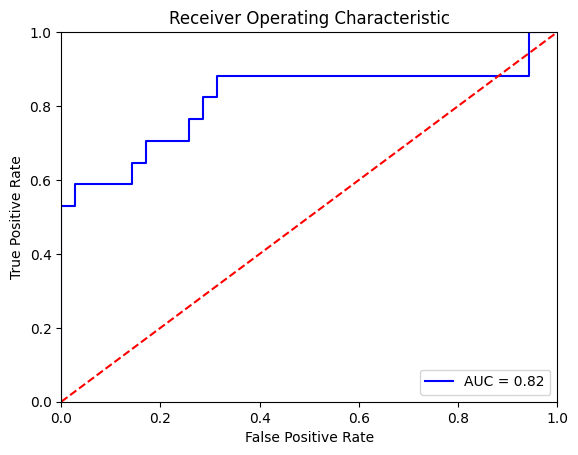

Threshold value is: 0.12994482
              precision    recall  f1-score   support

           0       0.92      0.69      0.79        35
           1       0.58      0.88      0.70        17

    accuracy                           0.75        52
   macro avg       0.75      0.78      0.74        52
weighted avg       0.81      0.75      0.76        52



In [376]:
y_pred_hxgb = hxgb.predict(X_validate)
y_pred_proba_hxgb = hxgb.predict_proba(X_validate)[:,1]
print(classification_report(y_validate, y_pred_hxgb))
ROC(y_validate, y_pred_proba_hxgb)
print(classification_report(y_validate, y_pred_proba_hxgb  >= ROC(y_validate, y_pred_proba_hxgb, return_optimal_threshold=True)))